In [1]:
%matplotlib inline
%config InlineBackend.figure_format="retina"

from IPython.display import Image

# Opslingering van de vraag in distributieketens

In dit interactieve notebook kan een student zichzelf in een aantal stappen inzicht in het zogenaamde "bullwhip effect" van distributieketens. Het fenomeen is het gevolg van opslingering van de vraag stroomopwaarts in een distributieketen als reactie op een verandering van de vraag naar eindproducten. Jay W. Forrester (1918-2016), de grondlegger van System Dynamics, is degene die het opslingereffect voor het eerst heeft beschreven en verklaard in de jaren 60 van de vorige eeuw. Om deze reden wordt het fenomeen ook wel het "Forrester effect" genoemd. Voor een beschrijving ervan wordt verwezen naar het nog altijd zeer lezenswaardige Forrester (1961).

## Simuleren van een productiesysteem

In onderstaande afbeelding is een systeemkundig model opgenomen van de logistieke besturing van een productiesysteem. Te zien is dat sprake is van een "Make to Stock" logistieke grondvorm waarbij uit voorraad wordt geleverd aan klanten.

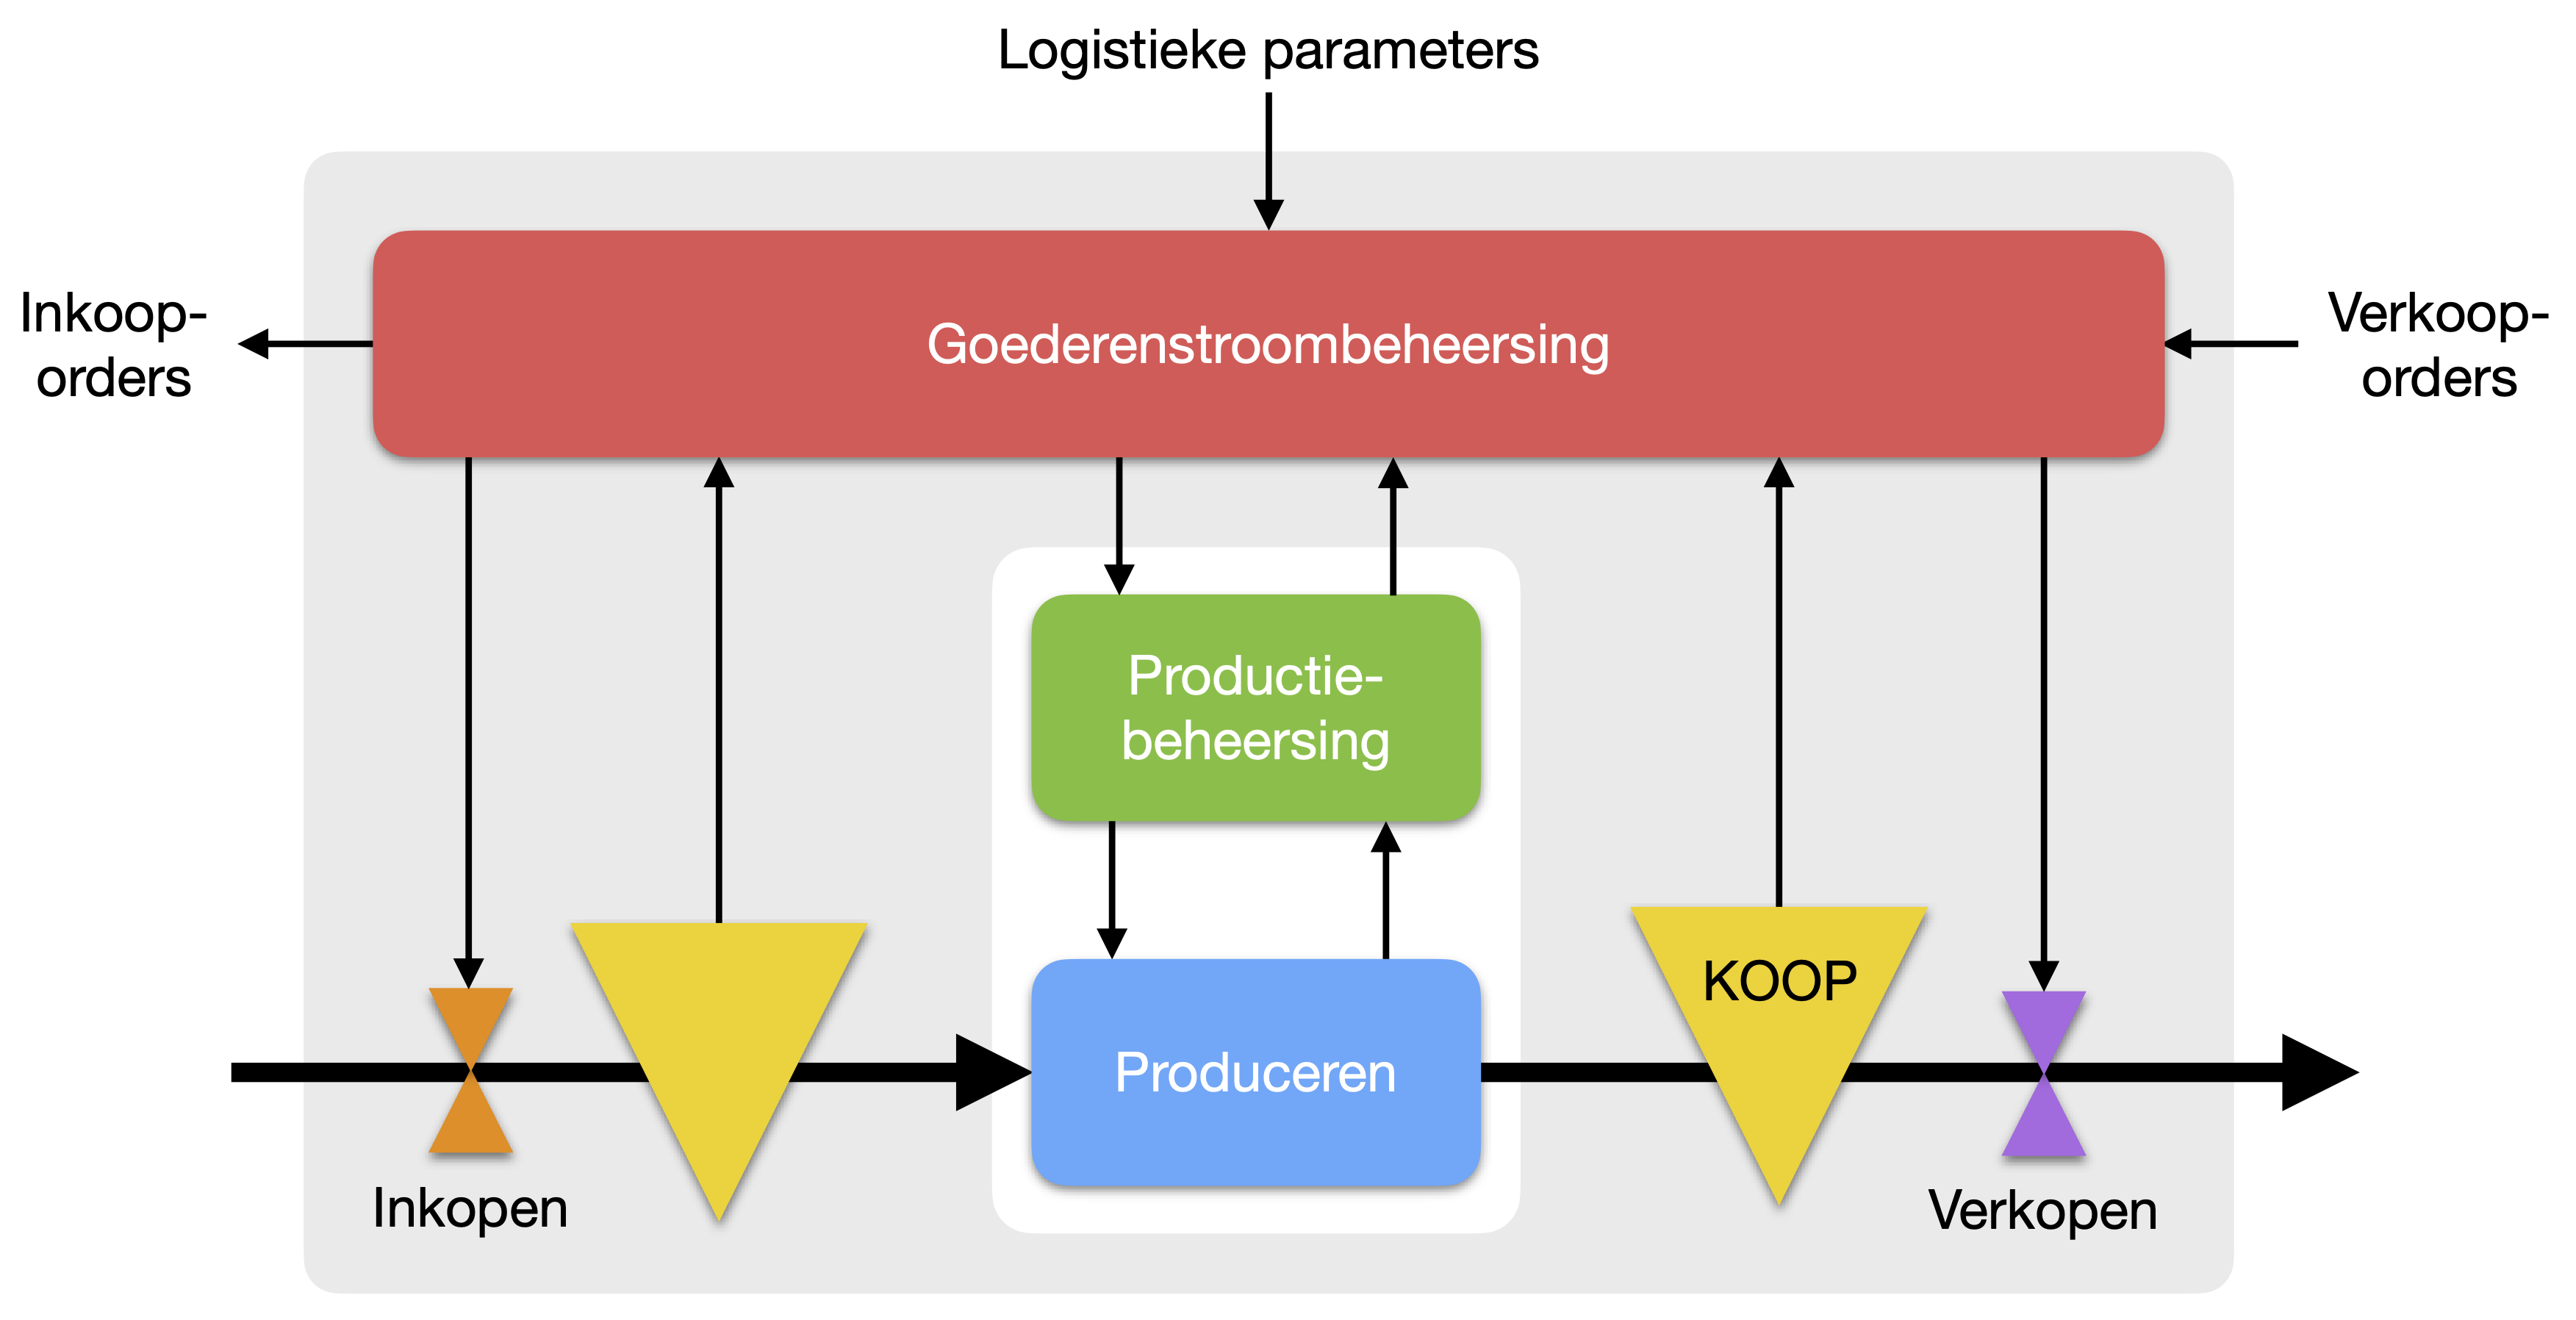

In [2]:
Image(filename='Besturingsconcept schakel.png', width=500)

In de onderstaande afbeelding is een stock-flow model van het productiesysteem weergegeven. Deze is gebasserd op het "Stock Management Problem", zoals beschreven in Sterman (2000). Met het stock-flow model wordt beoogd om het effect te laten zien van de mate waarin bij het bepalen van voorraadaanpassingen door het management rekening wordt gehouden met de "pijplijnvoorraad" die onderweg is. Deze pijplijnvoorraad bestaat uit de vooraad met inkomende goederen en het onderhandenwerk van de productie.

Ten opzichte van het systeemkundig model is in het stock-flow model de vooraad met inkomende goederen en het onderhandenwerk van de productie samengenomen in de stock pijplijn. In het stock-flow model zijn twee belangrijke regelkringen op basis van negatieve terugkoppeling opgenomen. De functie van deze regelkringen is om veranderingen in de vraag te verwerken zodanig dat de vraag, inkopen en verkopen op elkaar worden afgestemd. Deze afstemming zal met de nodige traagheid gepaard gaan, wat bij dynamische systemen onvermijdelijk is.

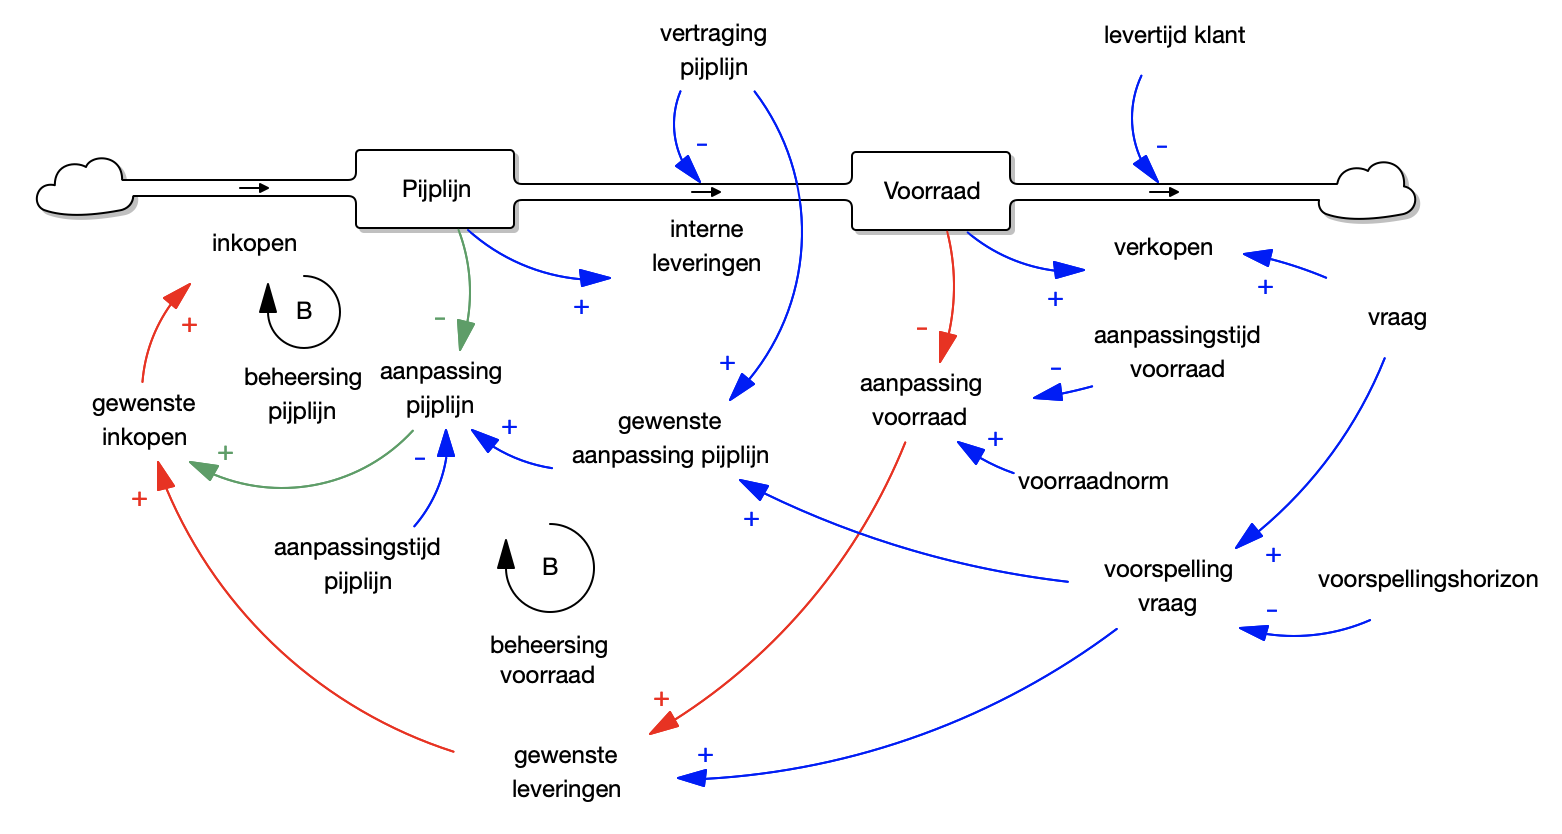

In [3]:
Image(filename='Productiesysteem.png', width=700)

De rode regelkring heeft betrekking op de beheersing van de voorraad aan eindproducten. De te nemen maatregel (gewenste leveringen) bestaat uit de som van de vraagvoorspelling en voorraadafwijking. Deze gewenste leveringen worden gecorrigeerd voor de pijplijnvoorraad. De gewenste pijplijnvoorraad in de groene regelkring wordt bepaald op basis van de vraagvoorspelling en de te nemen maatregel bestaat uit een aanpassing van de pijplijnvoorraad op basis van de feitelijke voorraad in de pijplijn. De gewenste inkopen bestaan uit de som van de aanpassing van de pijplijn en de gewenste leveringen. Voor de vraagvoorspelling is gebruik gemaakt van "simple exponential smoothing".

De mate waarin rekening wordt gehouden met de pijplijnvoorraad kan worden ingesteld met de variabele aanpassingstijd pijplijn. Als deze aanpassingstijd of tijdconstante heel groot genomen wordt ($\tau \rightarrow \infty$) dan betekent dat feitelijk dat door het management geen rekening wordt gehouden met de pijplijnvoorraad. Andersom geldt dat wanneer de aanpassingstijd kort genomen wordt, dit betekent dat het management wel rekening houdt met de pijplijnvoorraad.

De norm voor de gewenste aanpassing van de pijplijn is zoals beschreven gebaseerd op de vraagvoorspelling. Hiermee wordt uitgedrukt dat het management de gewenste leveringen even groot wil maken als de vraag. In formulevorm kan deze norm als volgt worden uitgedrukt:

$$
\begin{equation}
GAP = VSP \cdot PVT \quad \mathrm{[stuks]}
\end{equation}
$$

Hierin heeft $GAP$ betrekking op de gewenste aanpassing van de pijplijn, $VSP$ op de voorspelling en $PVT$ op de pijplijnvertraging. Het zou echter rationeler zijn als bij het bepalen van de gewenste aanpassing van de pijplijnvoorraad niet alleen met de vraagvoorspelling, maar ook met de gewenste voorraadaanpassing $GAV$ rekening zou worden gehouden:

$$
\begin{equation}
GAP = (VSP + GAV) \cdot PVT \quad \mathrm{[stuks]}
\end{equation}
$$

In de simulatie zal het effect van beide strategieën worden verkend. Door onderstaande cel in het interactieve notebook te starten, dit kan door het drukken op CTRL en ENTER of door het klikken op het driehoekje in de menubalk bovenaan het notebook, verschijnt een interactief menu met drie tabbladen. In het eerste tabblad kan de tijd worden ingesteld waarmee het management de pijplijnvoorraad wenst aan te passen, standaard staat deze op 1 week. Op het tweede tabblad kan een van de twee boven beschreven strategieën worden ingesteld voor de norm van de aanpassing van de pijplijnvoorraad. Standaard staat deze ingesteld op de eerste strategie, door te klikken op het vlakje kan de tweede meer rationele strategie worden geselecteerd. Op het derde tabblad kan tenslotte de voorspellingshorizon worden ingesteld. Hiermee wordt de gemiddelde tijd uitgedrukt tussen twee opeenvolgende voorspellingen. Deze staat standaard ingesteld op 2 week. Druk op "Run Interact" om de simulatie te starten.

Als het goed is verschijnen er drie grafieken. In de eerste grafiek wordt de voorraad aan eindproducten en de pijplijnvoorraad gevisualiseerd. De totale voorraad, zijnde de som van de voorraad eindproducten en de pijplijnvooraad, wordt in de tweede grafiek weergegeven. In de derde grafiek is een fasediagram opgenomen, hierover straks meer. Het productiesysteem start vanuit evenwicht of "steady state".

Maak de volgende opdrachten:
1. Varieer in het eerste tabblad dat betrekking heeft op de pijplijnvoorraad de aanpassingstijd van de pijplijnvoorraad van laag tot hoog. Welke systeemgedrag treedt op bij de eindvoorraad, pijplijnvoorraad en totale voorraad naarmate de aanpassingstijd toeneemt?
2. Onderzoek het effect van de twee strategieën op het systeemgedrag. Stel hiertoe eerst de aanpassingstijd van de pijplijnvoorraad in op 1 week en bepaal het effect van iedere strategie. Wordt het systeem stabieler of juist instabieler met de rationele strategie? Stel vervolgens de aanpassingstijd van de pijplijnvoorraad in op 10 weken en bepaal opnieuw het effect van de twee strategieën. Verandert de resonantiefrequentie afhankelijk van de strategie? Wordt deze hoger of lager bij de rationele strategie?
3. Stel de aanpassingstijd van de pijplijnvoorraad in op 10 weken en kies de niet rationele strategie. Varieer vervolgens in het derde tabblad de voorspellingshorizon van laag tot hoog. Wat is het effect van de voorspellingshorizon op het gedempte oscillatorisch gedrag van het productiesysteem?

In [2]:
%run schakel.py

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

Om de oorzaken van het instabiele systeemgedrag en de gedempte oscillatie te achterhalen, kan gebruik worden gemaakt van een fasediagram (de onderste grafiek uit bovenstaande simulatie). In een fasediagram worden twee toestandsvariabelen van een dynamisch systeem tegen elkaar uitgezet. Een toestandsvariabele heeft betrekking op een stock of accumulatie. In bovenstaand fasediagram zijn de stocks eindvoorraad $EV$ en de pijplijnvoorraad $PV$ tegen elkaar uitgezet.

In de grafiek kan worden afgelezen hoe de stocks ten opzichte van elkaar variëren. Bij aanvang van de simulatie op $t=0$ is $EV(0) = 400$ en $PV(0) = 300$. Aan het einde van de simulatie op $t=60$ zijn de toestanden van het systeem $EV(60 = 400$ en $TV(60) = 600$. De volgende zaken vallen op in het fasediagraam gedurende de weg van de begintoestanden naar de eindtoestanden:
- Naarmate $EV$ afneemt, neemt $PV$ geleidelijk toe;
- Wanneer $EV$ weer gaat toenemen, neemt eerst ook $PV$ weer toe;
- Als $EV$ verder stijgt, neemt $PV$ licht af;
- In de buurt van het nieuwe "steady state" eindpunt schiet $EV$ eerst voorbij 400 stuks en kort daarna schiet $PV$ onder 600 stuks;
- Daarna schiet $EV$ weer onder 400 stuks en vervolgens schiet $PV$ voorbij 600 stuks;
- Uiteindelijk komt het productiesysteem tot rust in het punt $(400, 600)$.

In het fasediagram wordt het door het productiesysteem afgelegde traject gevisualiseerd van het evenwicht aan het begin, naar het nieuwe evenwicht aan het einde. Hierbij valt op dat de twee toestanden niet gelijktijdig laag c.q. hoog zijn. Er is in meer technische termen sprake van dat $EV$ en $TV$ niet met elkaar in fase zijn. Het faseverschil blijkt overigens ook al uit de andere grafieken. ook daar is namelijk te zien dat de twee toestanden niet op hetzelfde moment pieken. Het oscillatorisch gedrag van het productiesysteem wordt veroorzaakt door het faseverschil tussen de twee toestanden. Naarmate in het model bij de inkopen minder rekening wordt gehouden met de pijplijnvooraad, neemt het faseverschil toe en wordt het oscillatorisch gedrag van het productiesysteem groter.

## Simuleren van een distributieketen

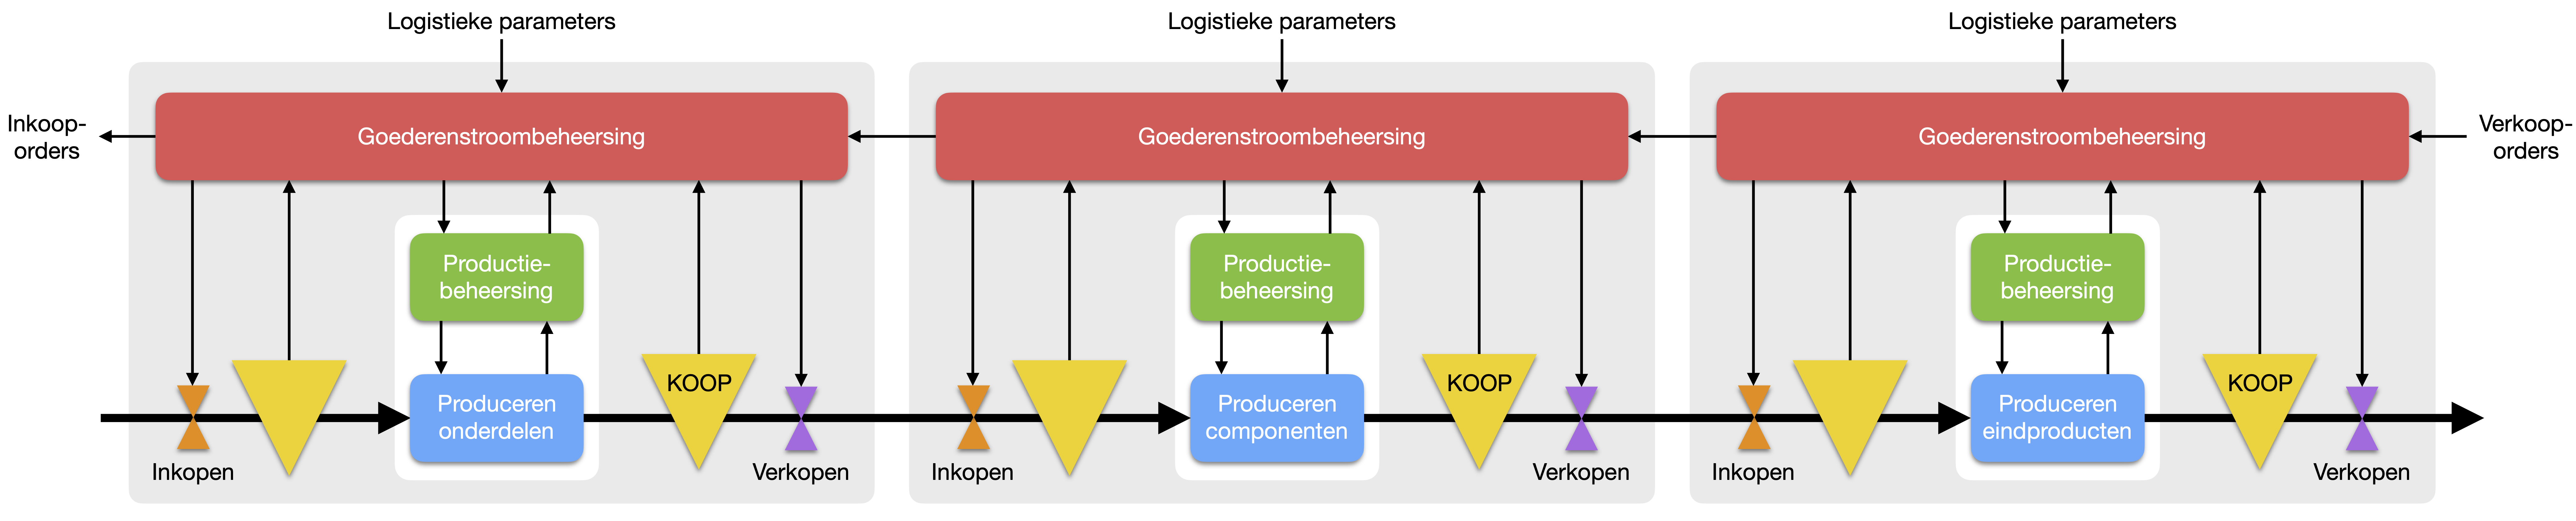

In [5]:
Image(filename='Besturingsconcept keten.png', width=900)

In [6]:
%run keten.py

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

Uitleg

## Simuleren van een distributieketen met integrale besturing

Hiërarchische besturing

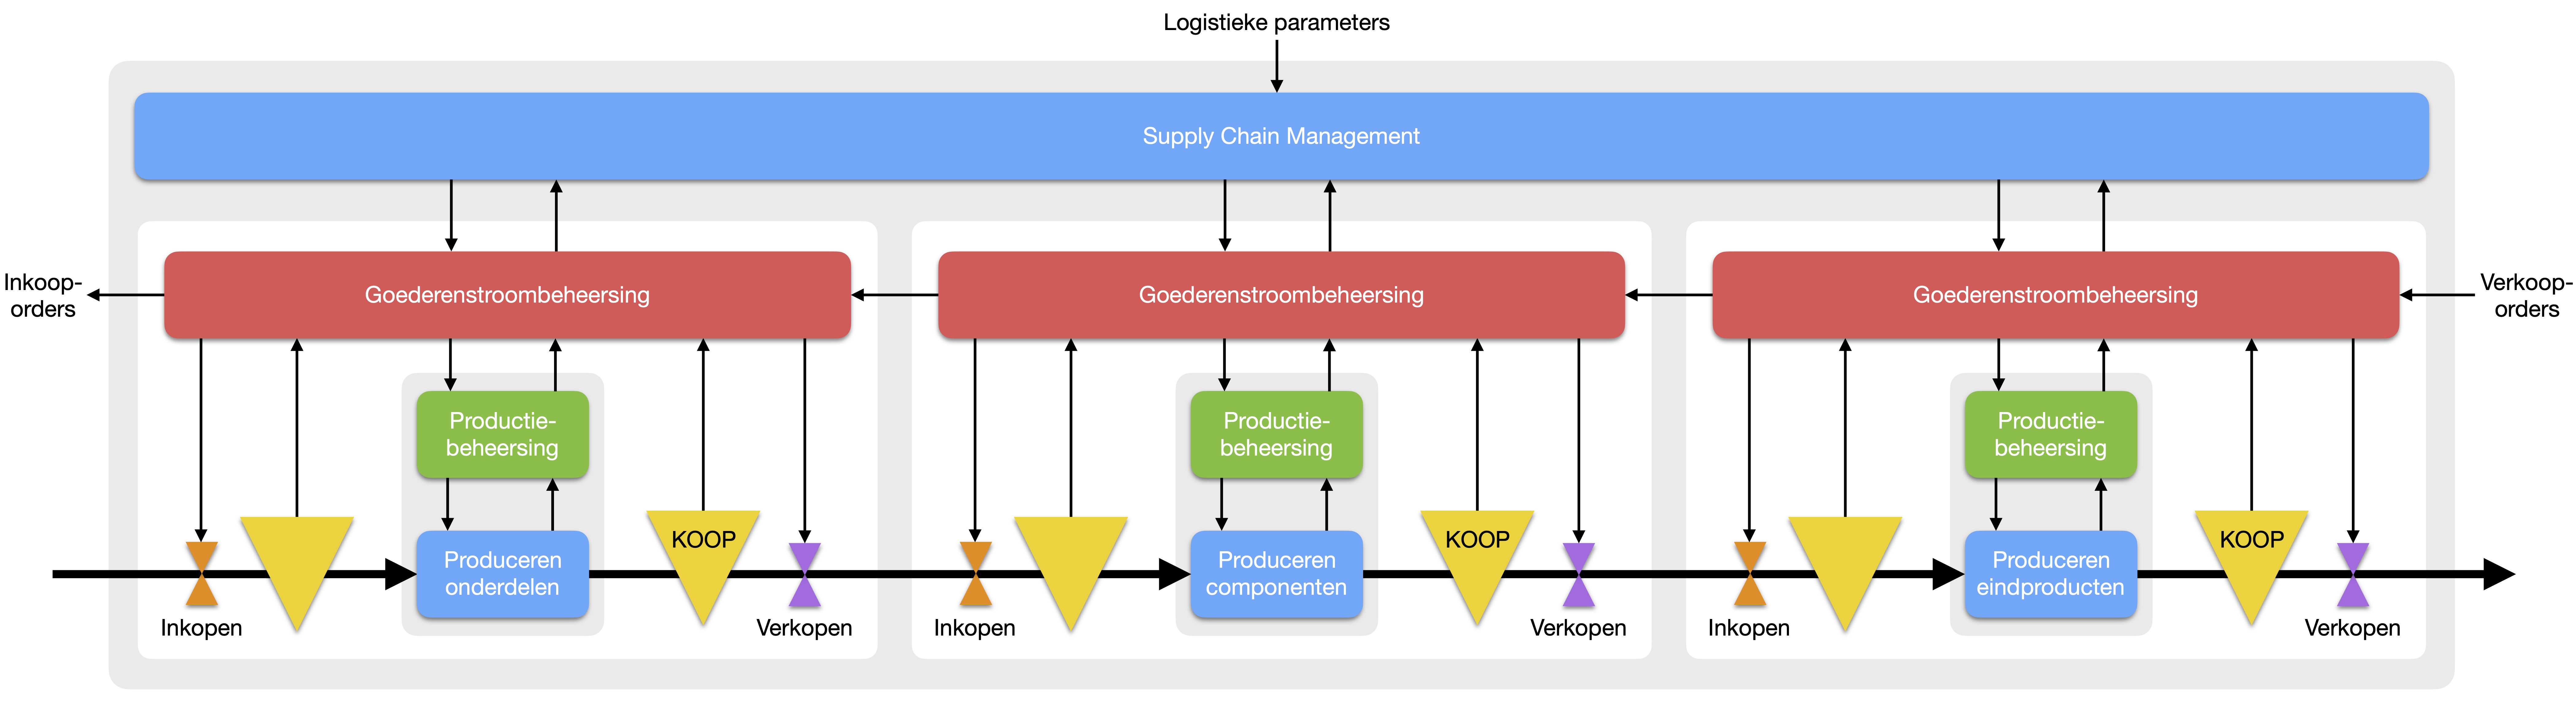

In [7]:
Image(filename='Besturingsconcept keten integraal.png', width=900)

Uitleg

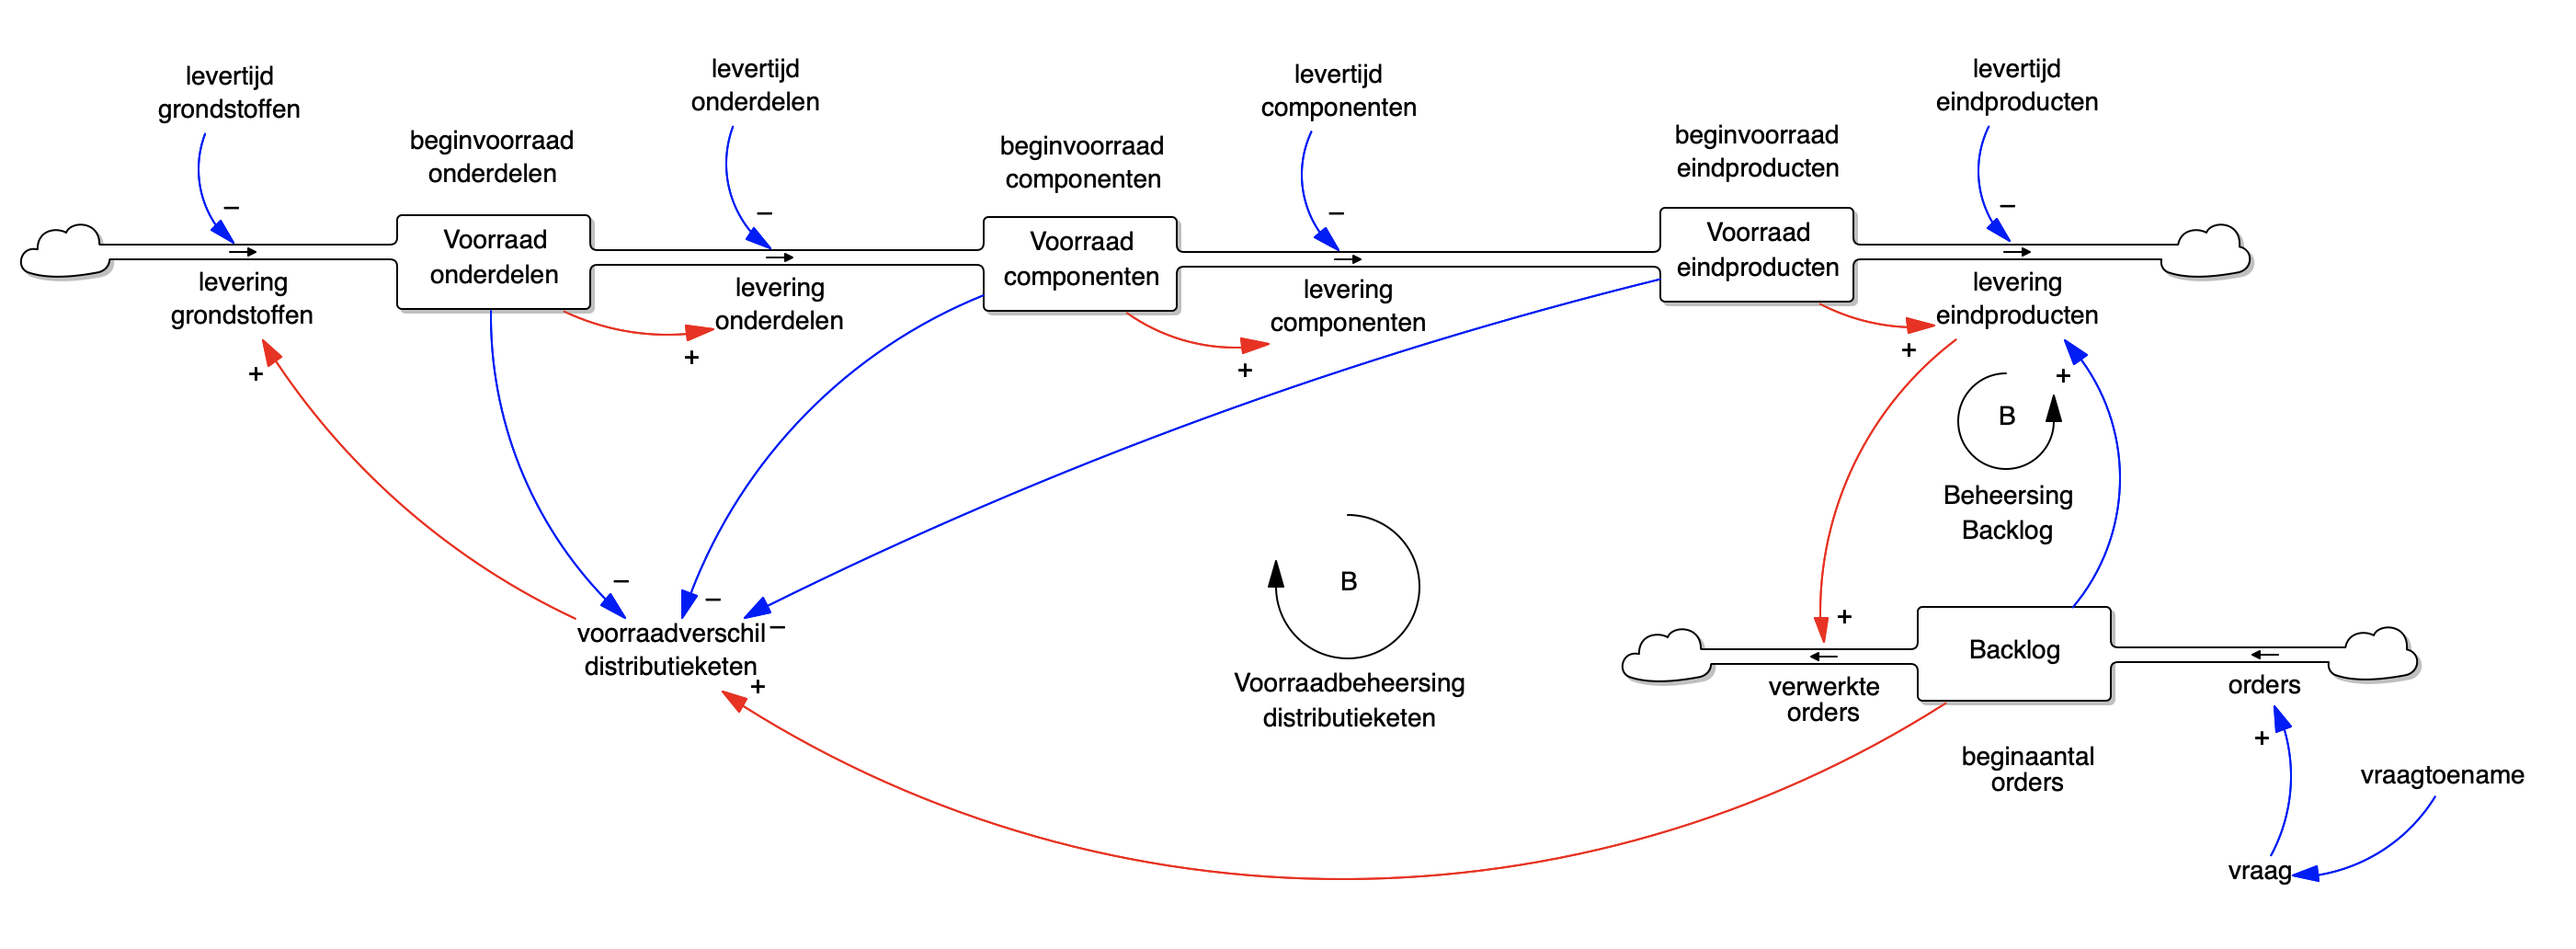

In [8]:
Image(filename='Integrale besturing.png', width=900)

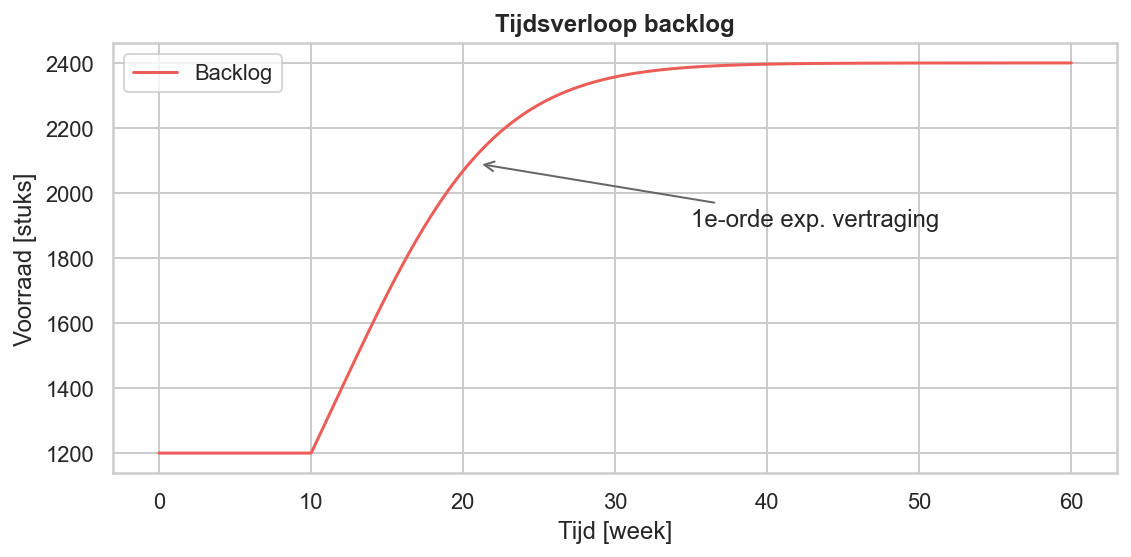

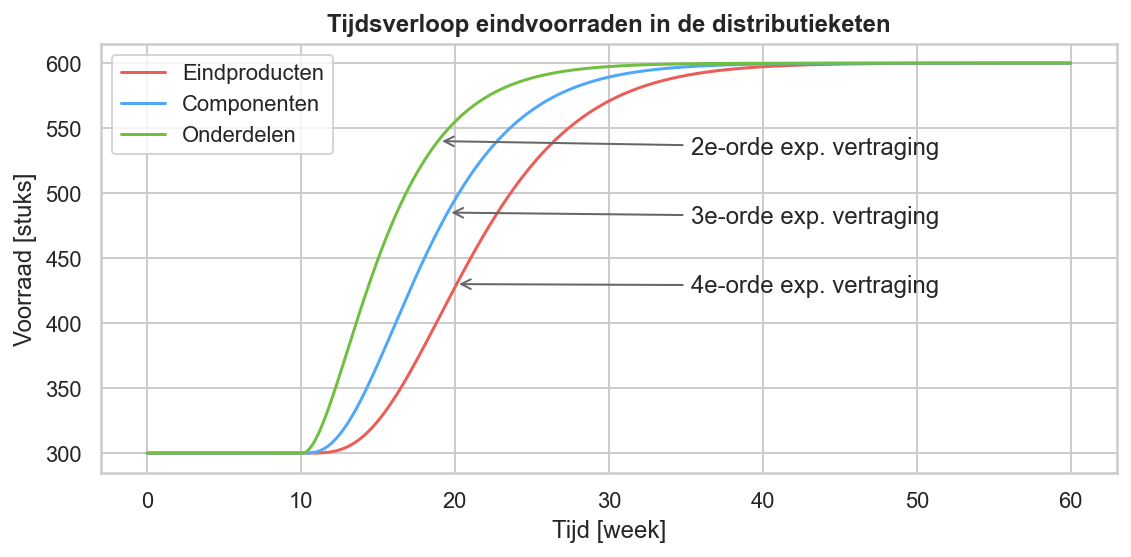

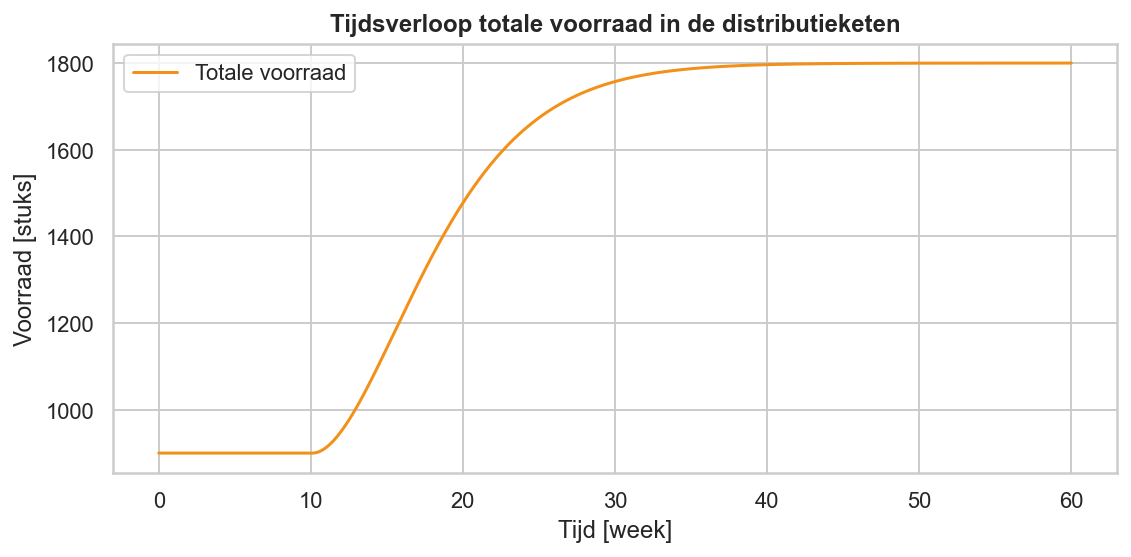

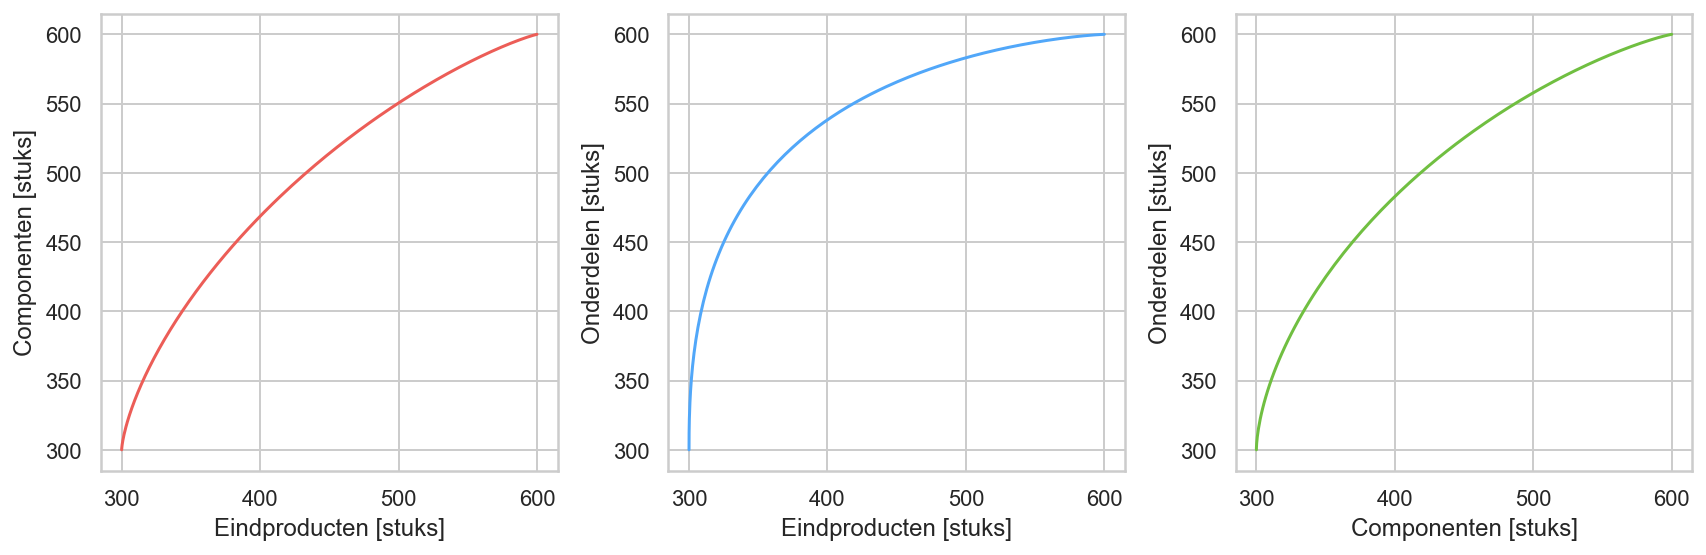

<Figure size 576x288 with 0 Axes>

In [10]:
%run integraal.py

# Referenties

Forrester, J.W. (1961), *Industrial Dynamics*, MIT Press, Cambridge, Mass.

Sterman, J. (2000), *Business dynamics: systems thinking and modeling for a complex world*, Irwin/McGraw-Hill, Boston


> © Jan-Peter Vos (2022)